<a href="https://colab.research.google.com/github/BlackCurrantDS/Data-Mining/blob/master/Optiver_Volitality_prediction_EDA_Dtale_and_sweetviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA using Dtale using Optiver Volitality prediction

In [16]:
mv /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

mv: cannot stat '/content/drive/MyDrive/Kaggle/kaggle.json': No such file or directory


In [17]:
#setting permission
!chmod 600 /root/.kaggle/kaggle.json

In [18]:
#connecting to API
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

In [20]:
#lets see all the files from the Optiver dataset
api.competition_list_files('optiver-realized-volatility-prediction')    

[trade_test.parquet/stock_id=0/31c83a67d81349208e7d5eace9dbbac8.parquet,
 book_train.parquet/stock_id=116/bd6b0dc7386c49a79856b8df04e4a33b.parquet,
 book_train.parquet/stock_id=11/755d9c4058914e2a901aaeccf2406e30.parquet,
 book_train.parquet/stock_id=114/22c84a10a4b4477b85b5bf7688037e77.parquet,
 book_train.parquet/stock_id=112/89c931289b58423bb27b45ce8109c148.parquet,
 book_train.parquet/stock_id=105/a37b8bf4be2e4fa5b3ea63b7c4240d3d.parquet,
 book_train.parquet/stock_id=1/31a1c5cd6d8546b383d10373db762236.parquet,
 book_train.parquet/stock_id=113/2698c014aa014ce0a476ccaf13795a43.parquet,
 book_train.parquet/stock_id=0/c439ef22282f412ba39e9137a3fdabac.parquet,
 book_train.parquet/stock_id=10/d671bb2b87f447d4ba3fa4b18b3656f9.parquet,
 book_train.parquet/stock_id=103/cc7984f01a8747299339cb441632d6c0.parquet,
 book_train.parquet/stock_id=109/fede24892e38482a9b0a0af7adb1030c.parquet,
 book_train.parquet/stock_id=102/9d16ca233fea42c7a8ec91d621ca113a.parquet,
 book_train.parquet/stock_id=111/

In [24]:
#download
api.competition_download_files('optiver-realized-volatility-prediction')

In [26]:
#unzip
zf = zipfile.ZipFile('/content/optiver-realized-volatility-prediction.zip')
#extracted data is saved in the same directory as notebook
zf.extractall('/content/Optiver') 
zf.close()

In [4]:
#lets pick one book example
book = pd.read_parquet('/content/Optiver/book_train.parquet/stock_id=0/c439ef22282f412ba39e9137a3fdabac.parquet')

In [32]:
book.head(5)

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100


In [ ]:
#stats
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff() 

def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

def calc_stats(df):
    df['size_spread_l1'] = df['ask_size1'] - df['bid_size1']
    df['size_spread_l2'] = df['ask_size2'] - df['bid_size2']
    
    df['price_spread_l1'] = df['ask_price1'] - df['bid_price1']
    df['price_spread_l2'] = df['ask_price2'] - df['bid_price2']
    
    df['wap'] = (df['bid_price1'] * df['ask_size1'] + df['ask_price1'] * df['bid_size1']) / (df['bid_size1']+ df['ask_size1'])
    
    df.loc[:,'log_return'] = log_return(df['wap'])
    df = df[~df['log_return'].isnull()]
    
    # This is wrong
    df['realized_vol'] = realized_volatility(df['log_return'])
    
    return df

DTale

https://inblog.in/Introduction-to-D-Tale-QTaeUSY38E

In [27]:
pip install dtale

     |████████████████████████████████| 14.4MB 213kB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 1.8MB 36.4MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 194kB 49.4MB/s 
     |████████████████████████████████| 645kB 34.7MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 79.9MB 100kB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
     |████████████████████████████████| 20.6MB 1.5MB/s 
     |████████████████████████████████| 1.0MB 35.1MB/s 
     |████████████████████████████████| 3.5MB 31.6MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
     |████████████████████████████████| 1.8MB 27.7MB/s 
     |████████████████████████████████| 358kB 35.2MB/s 
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-cp37-none-any.whl size=62589 sha256=3ce52c61b5269eab27f0f3c596dcbfba1447d2852b6181e199fba58e5f70d

In [11]:
import dtale

import dtale.app as dtale_app

In [12]:
dtale_app.USE_COLAB = True

In [13]:
dtale.show(book)

https://s27vc9za96d-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

sweetviz

In [ ]:
pip install sweetviz

In [1]:
import sweetviz

In [ ]:
book_report  = sweetviz.analyze([book,'Train'])


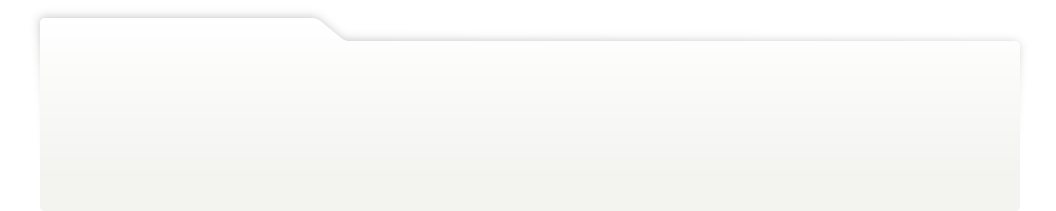
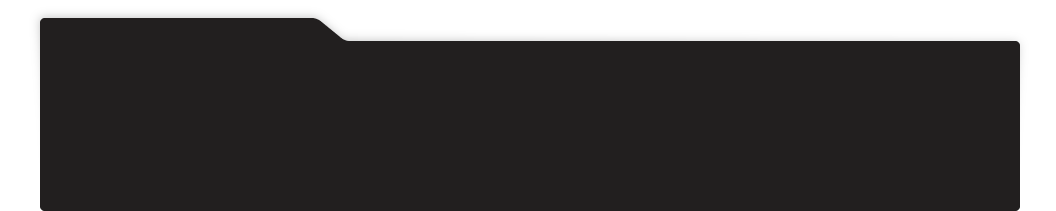
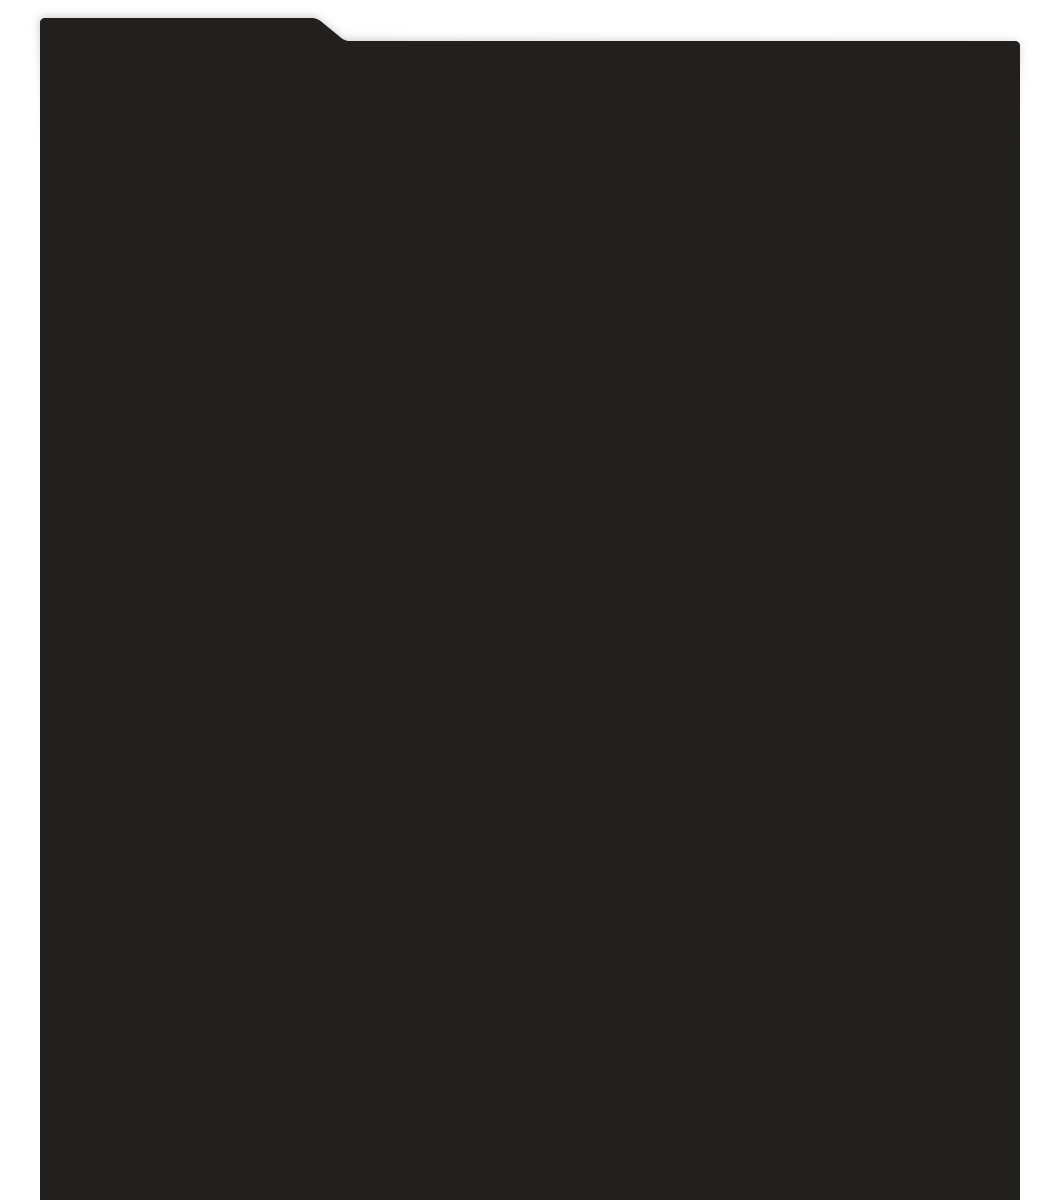
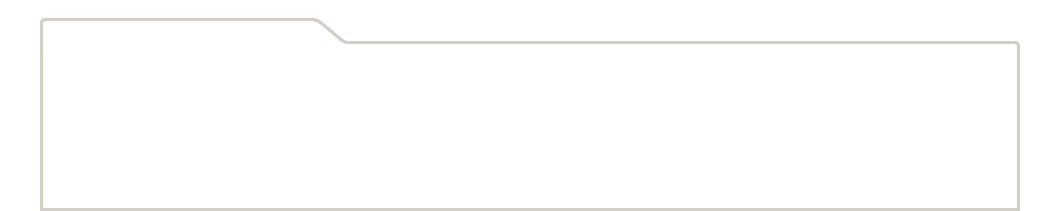
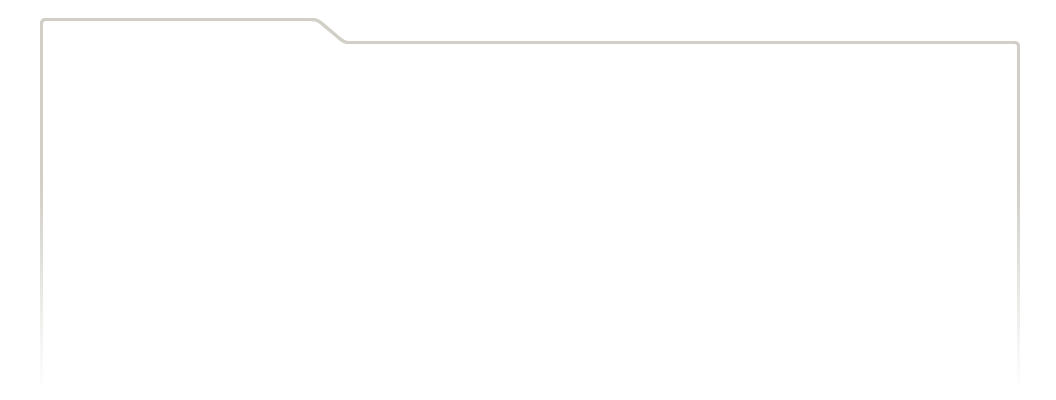
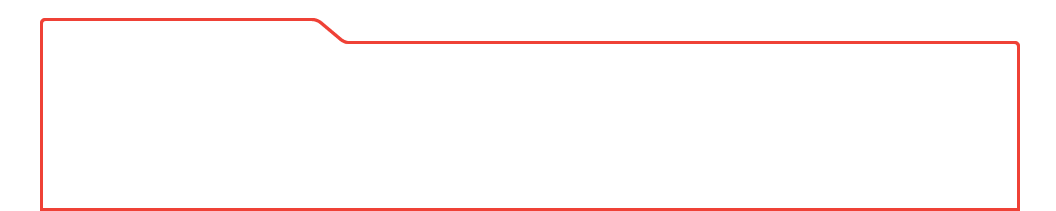
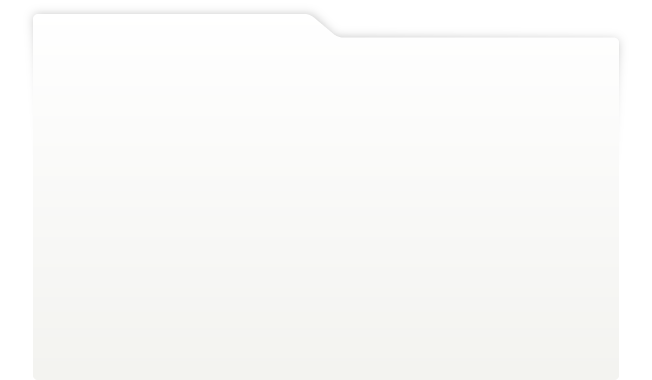
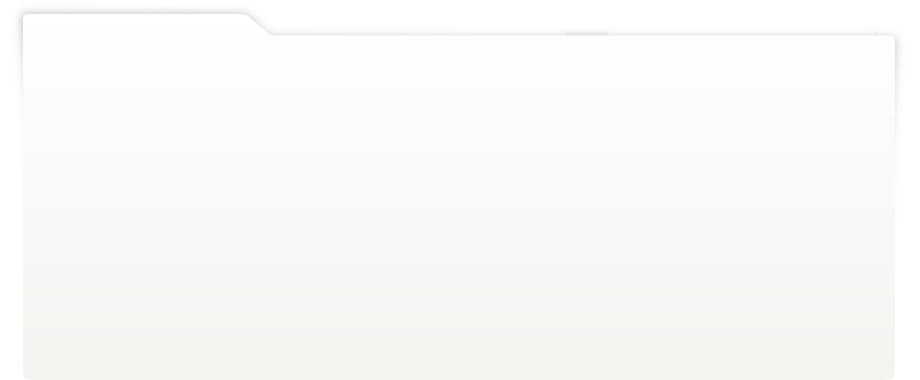
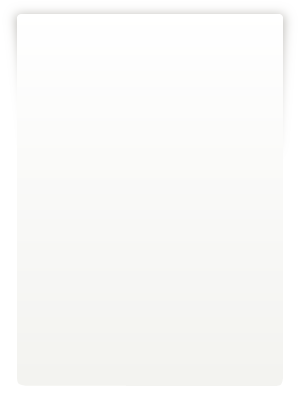
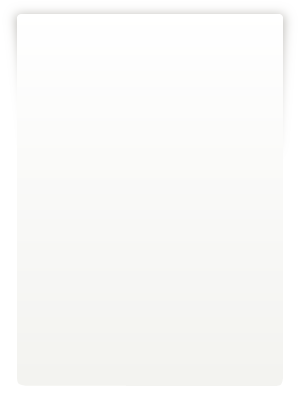
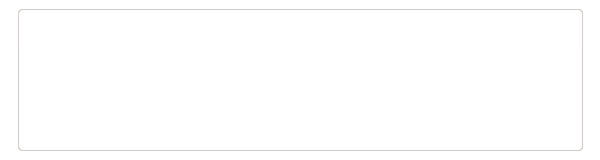
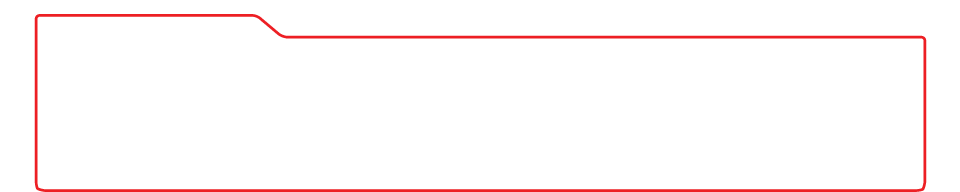
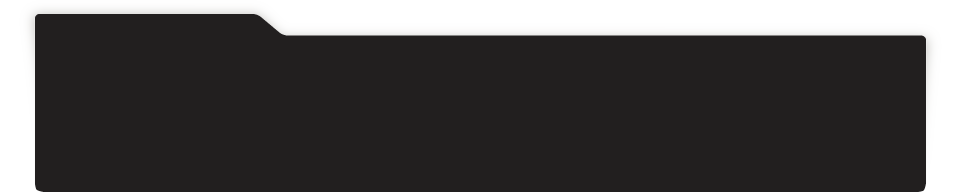
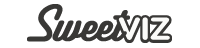
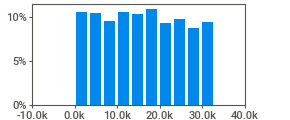
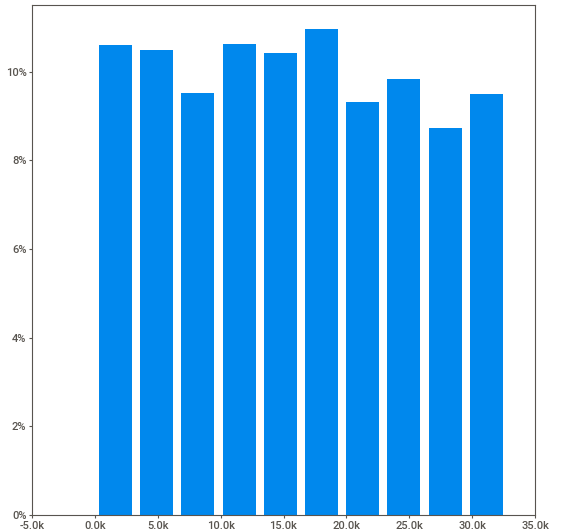
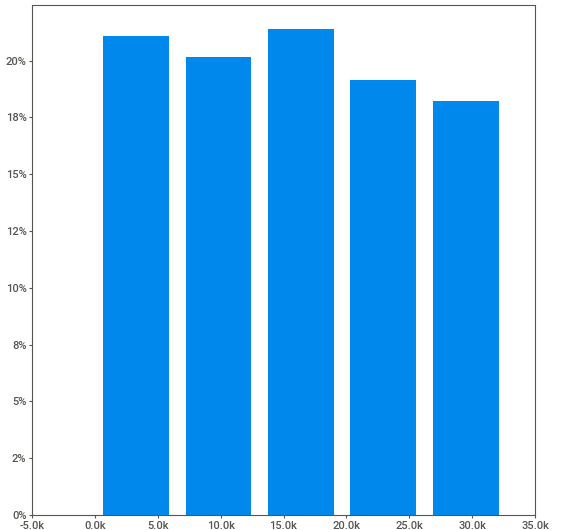
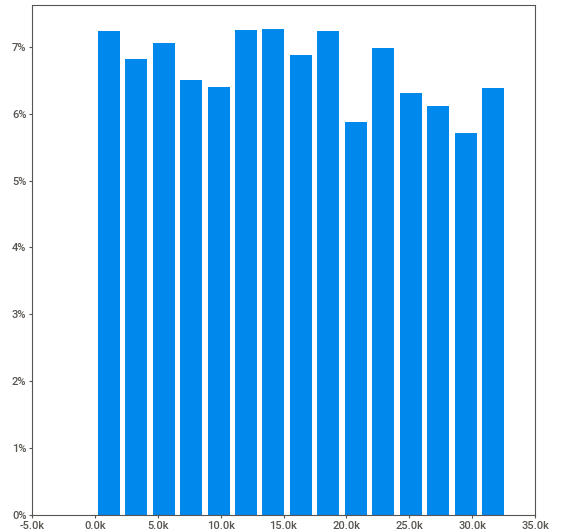
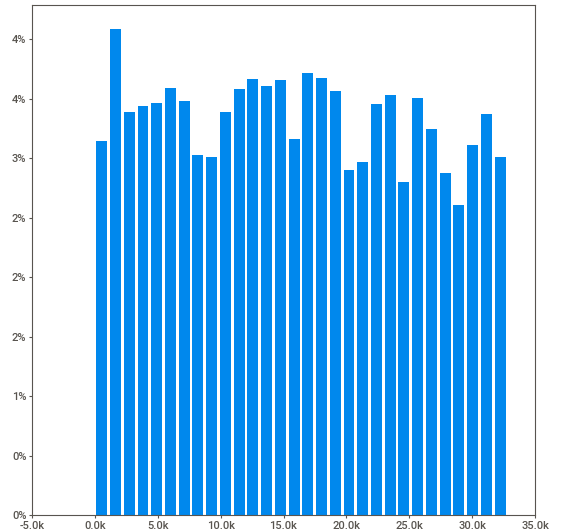
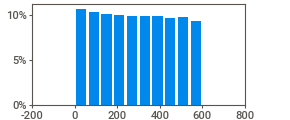
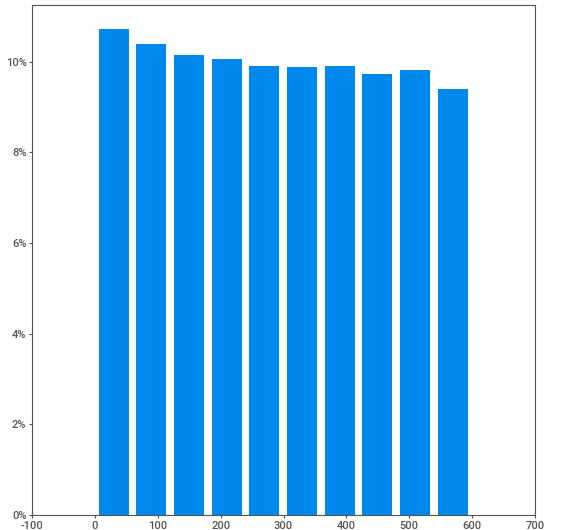
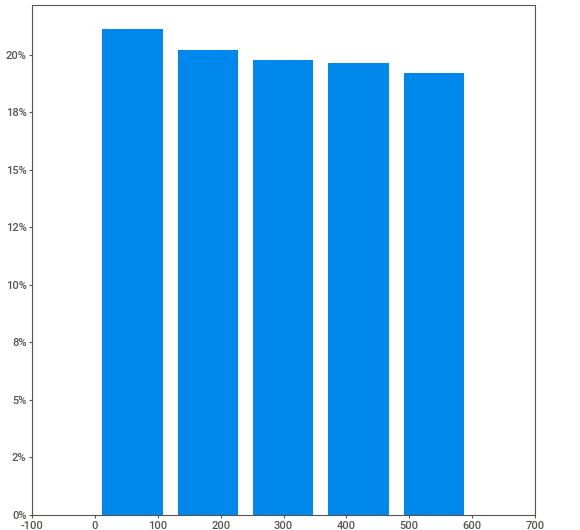
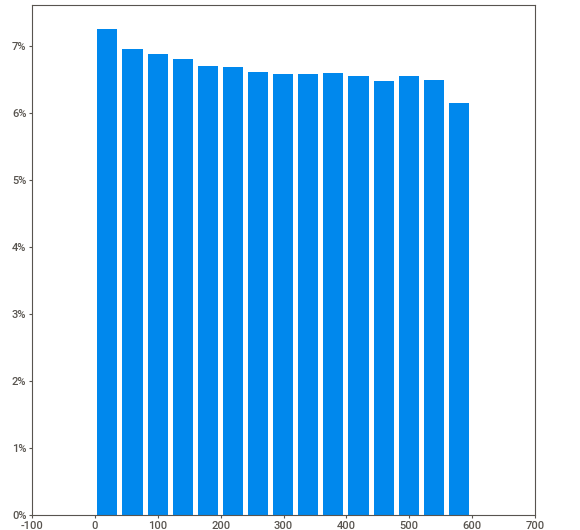
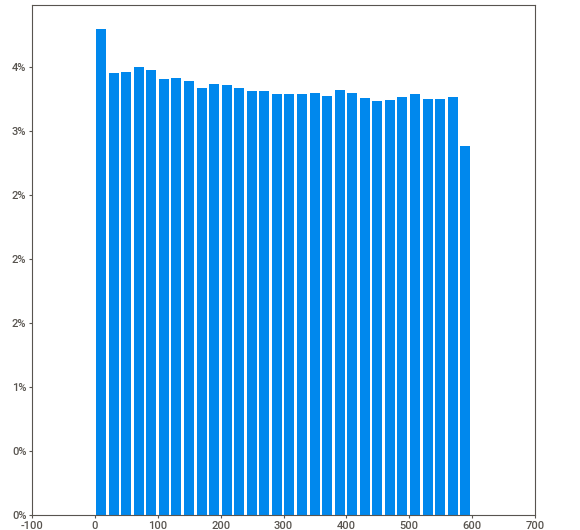
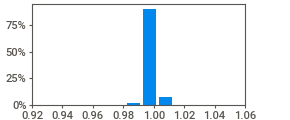
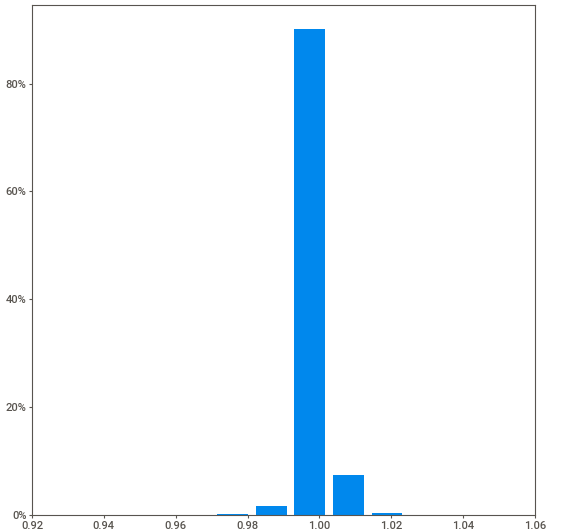
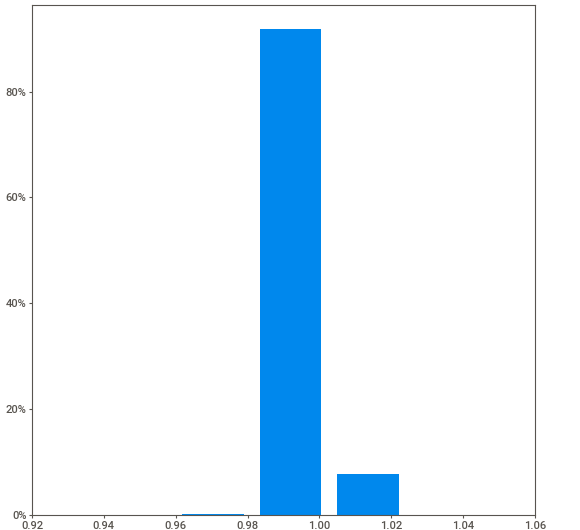
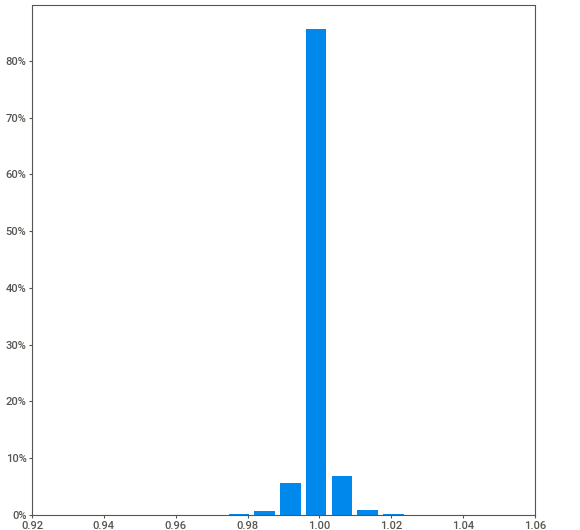
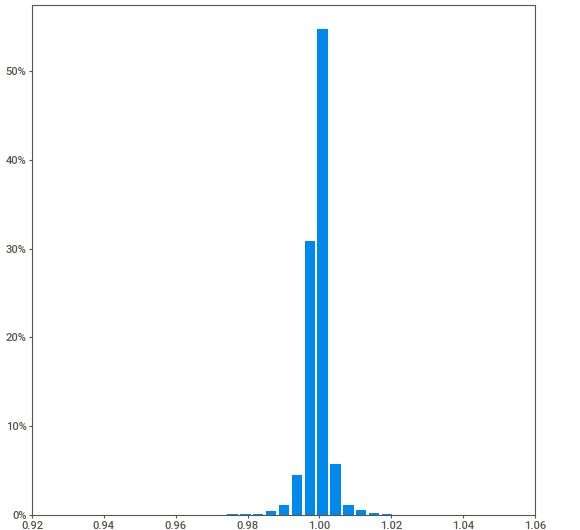
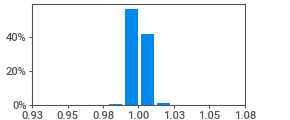
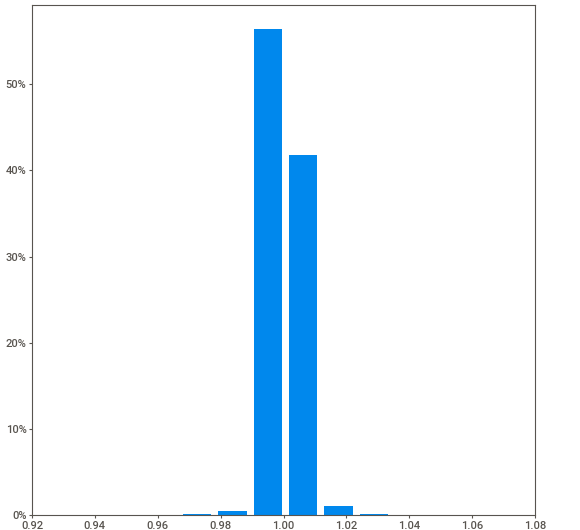
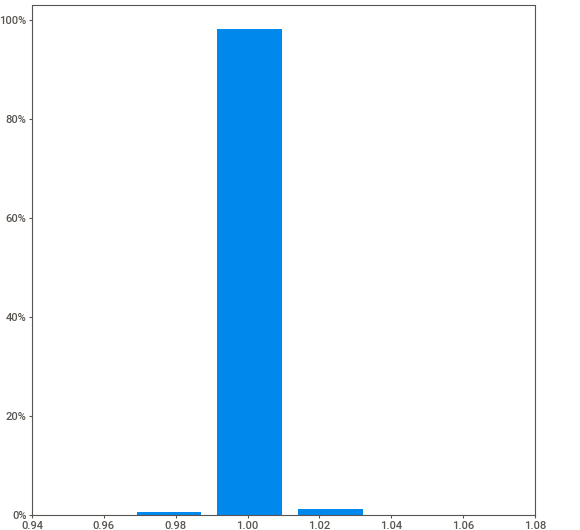
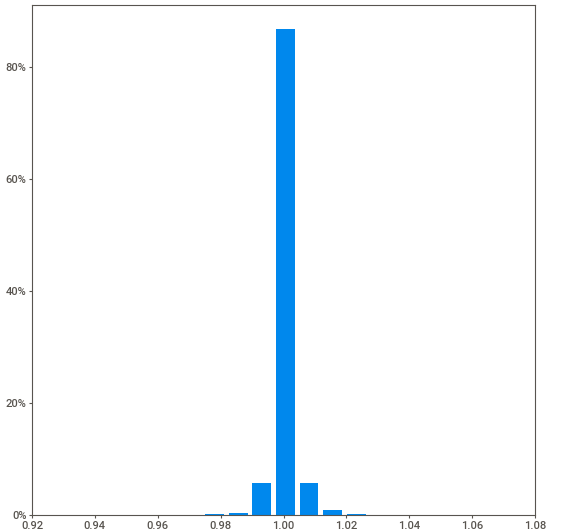
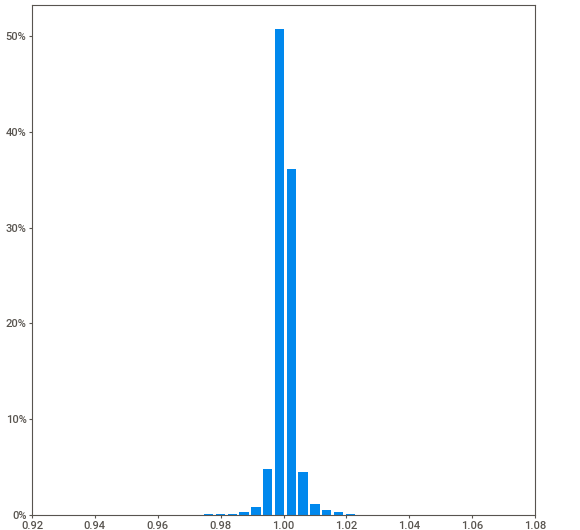
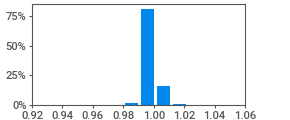
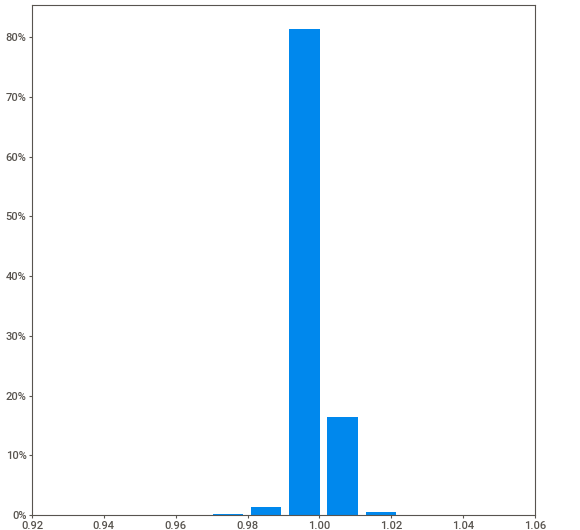
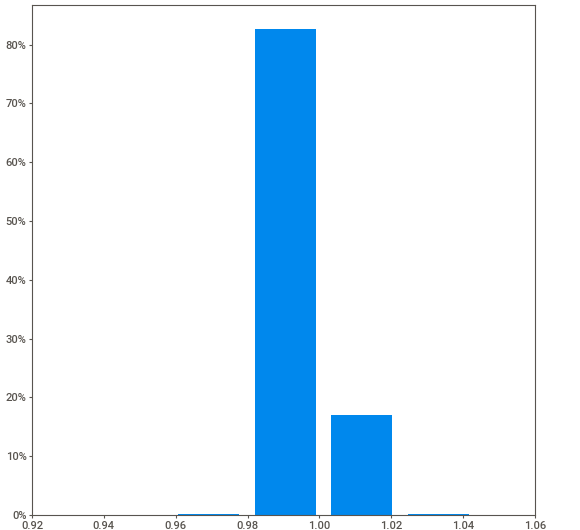
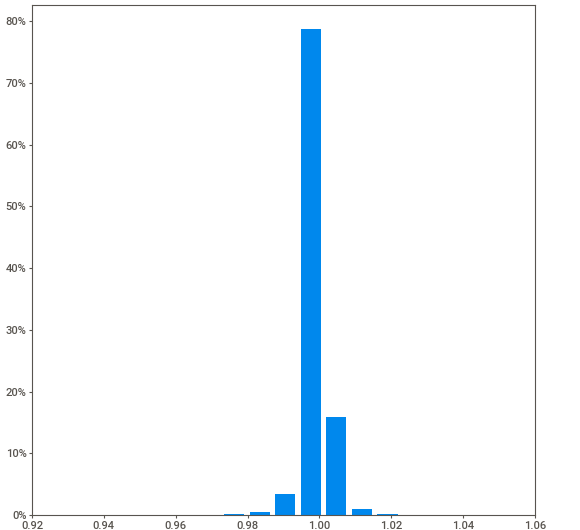
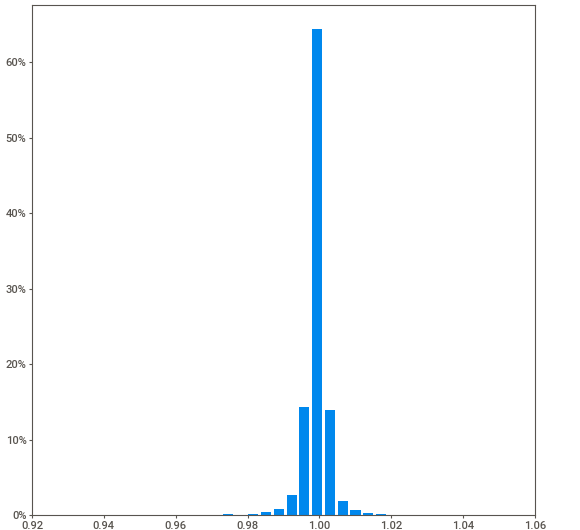
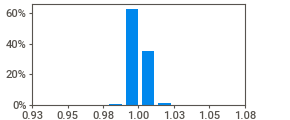
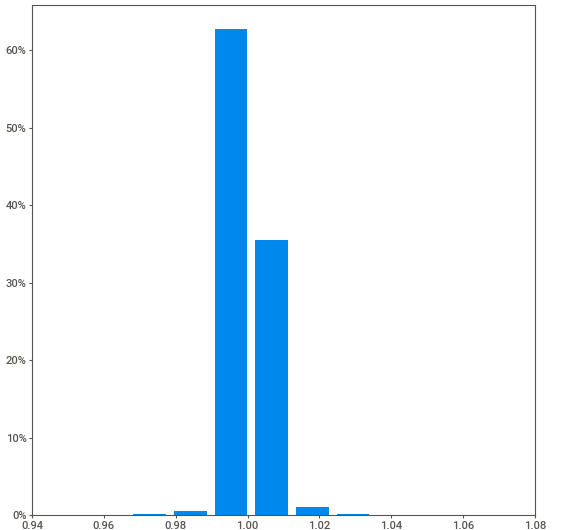
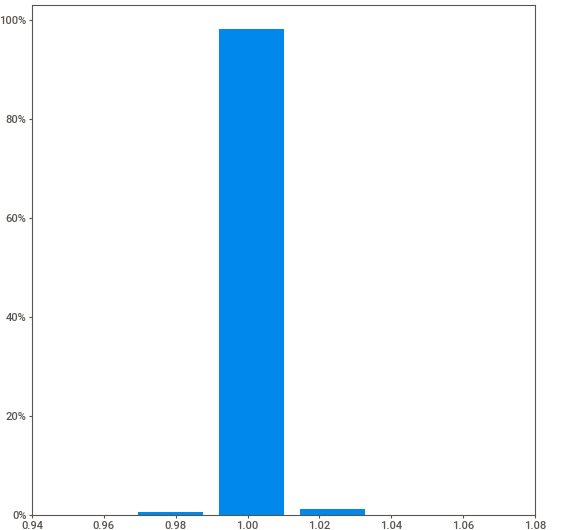
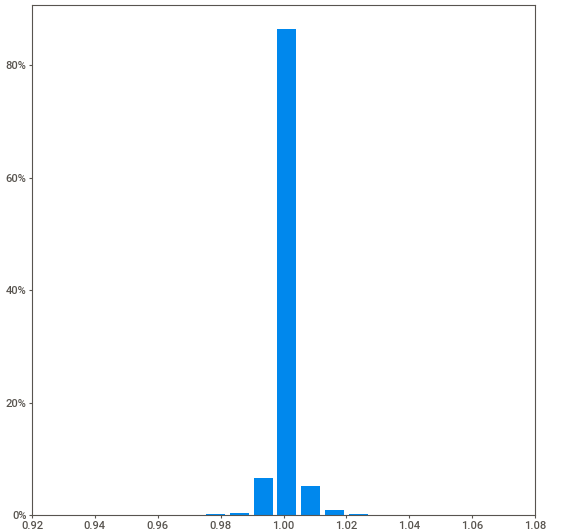
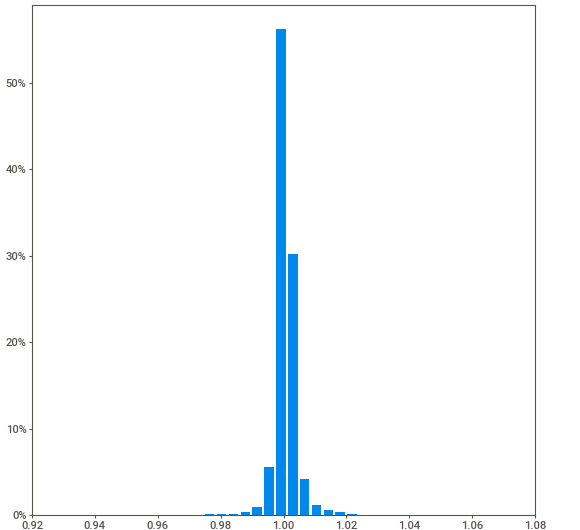
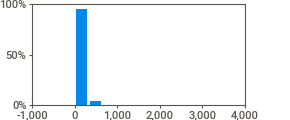
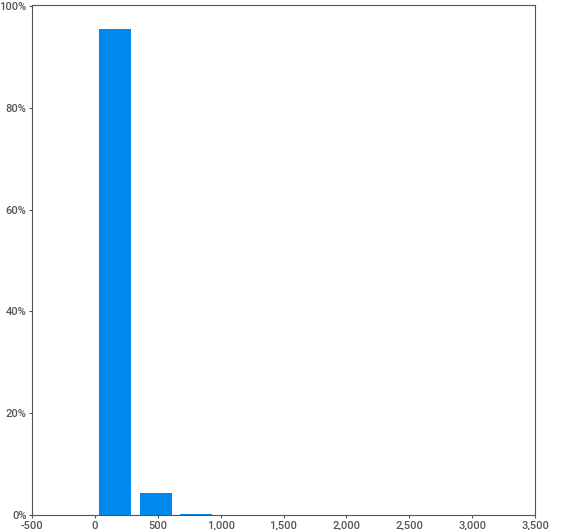
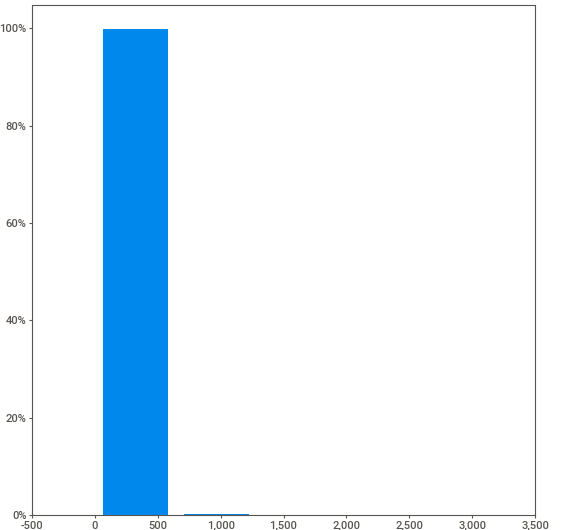
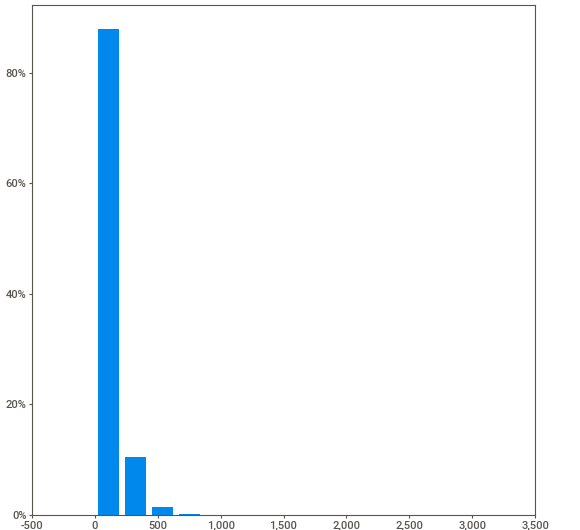
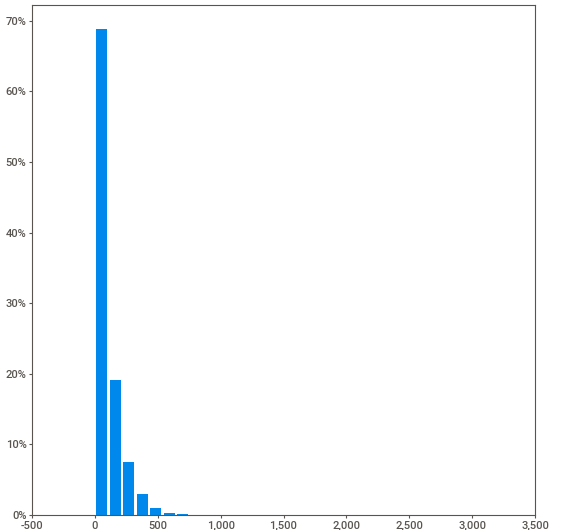
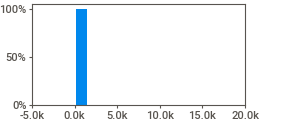
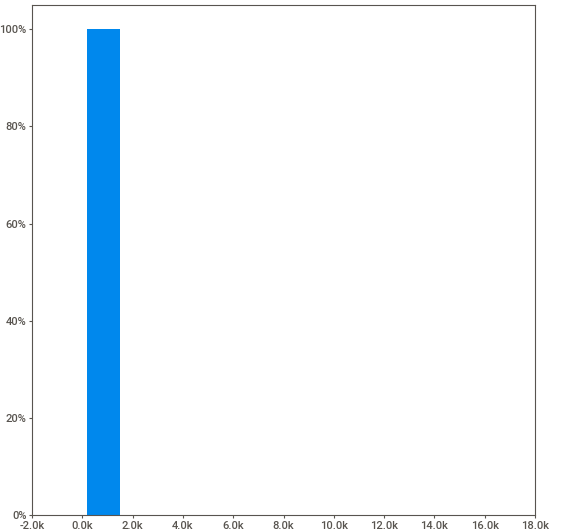
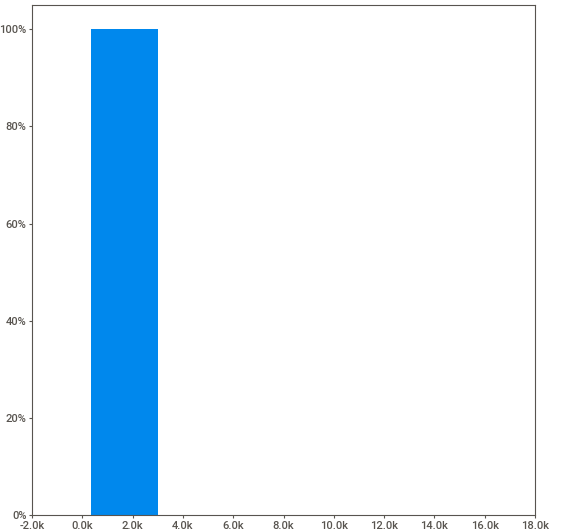
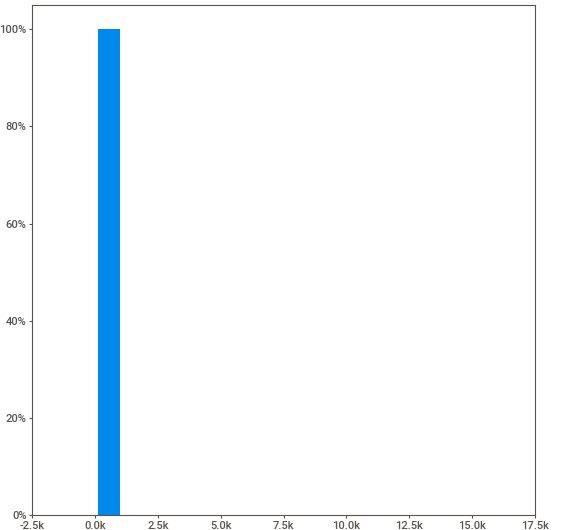
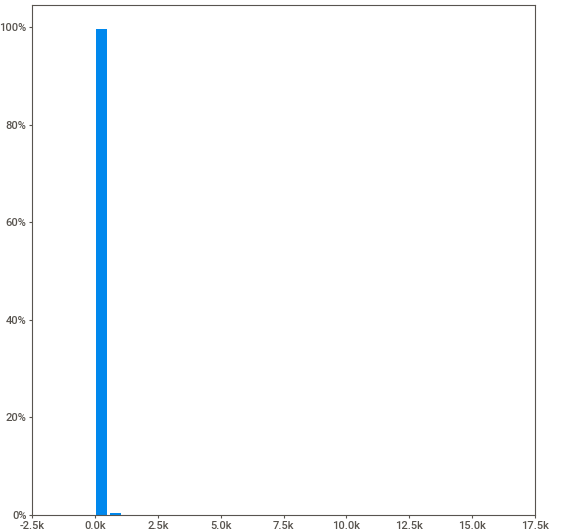
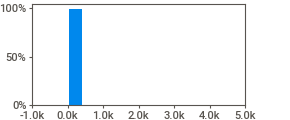
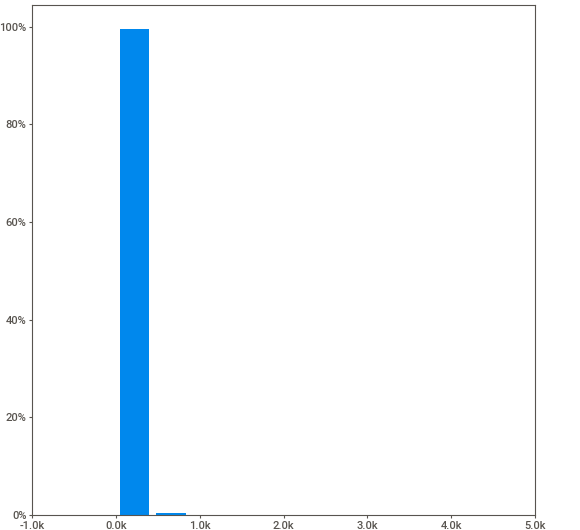
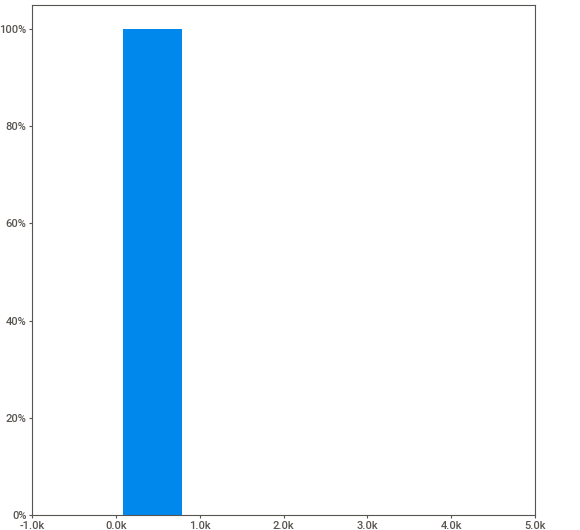
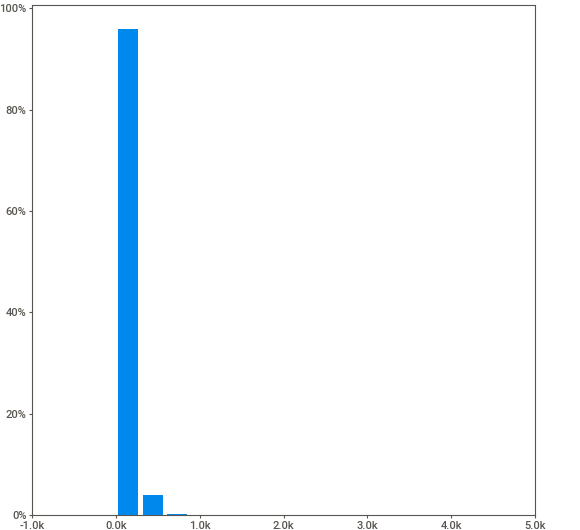
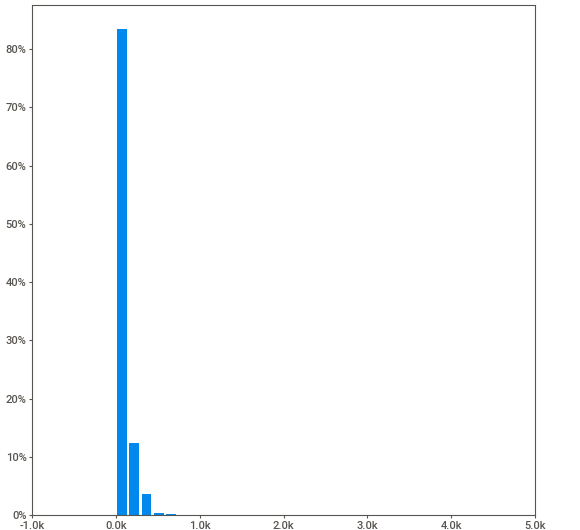
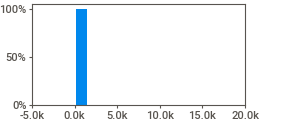
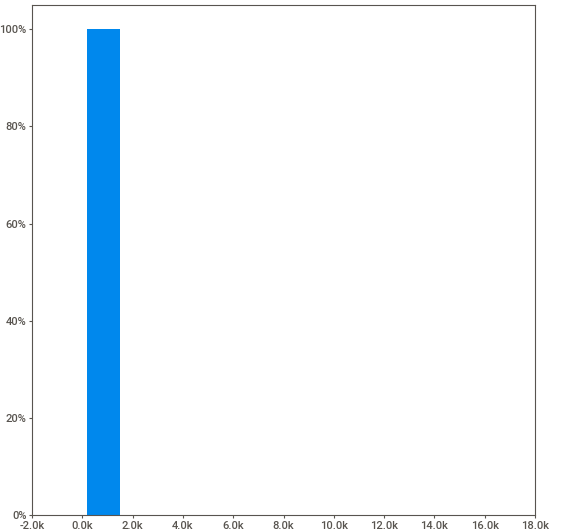
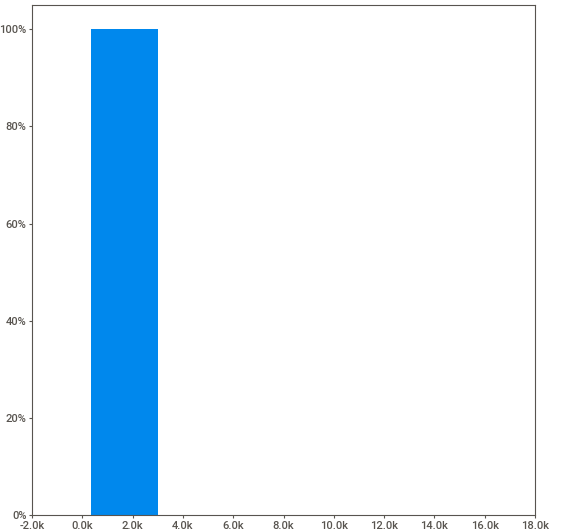
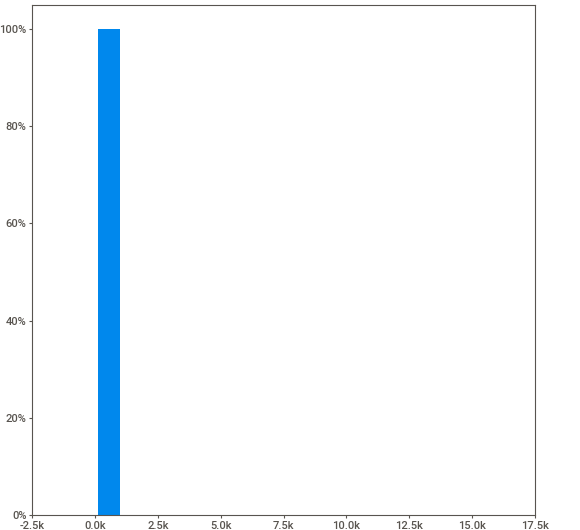
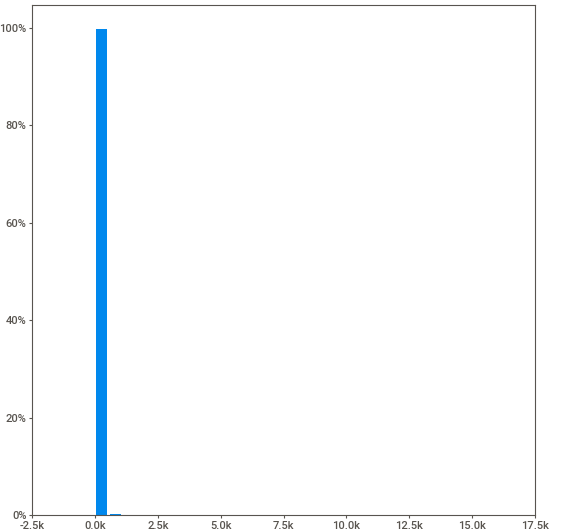
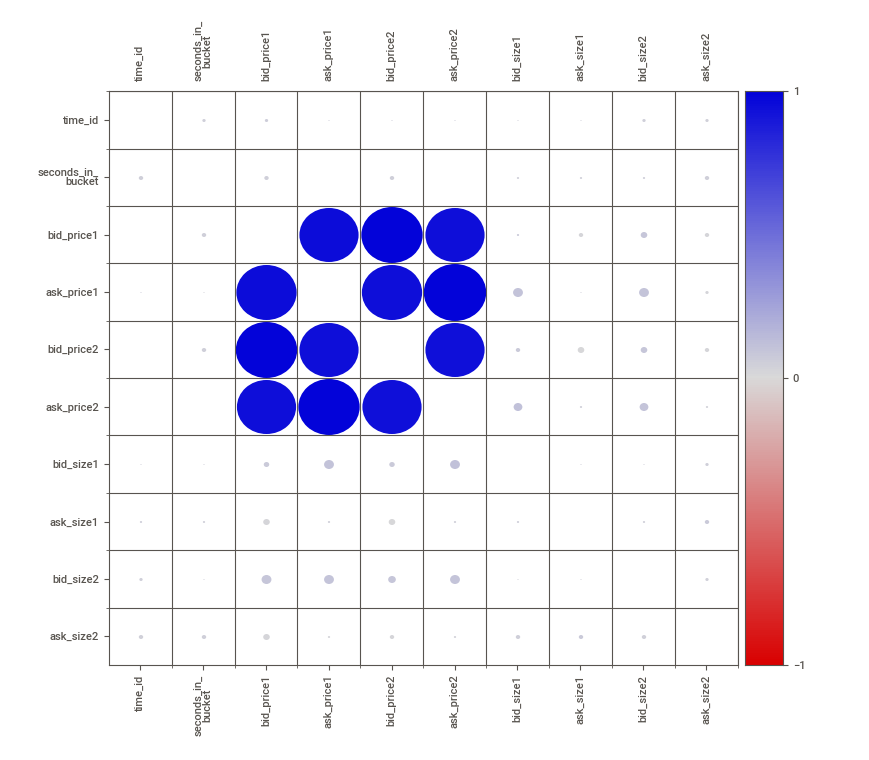
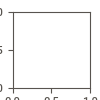

In [7]:
book_report.show_notebook()